In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import random
from sklearn.model_selection  import train_test_split
from sklearn.svm import SVC

In [3]:
dir = 'D:\\cat dog\\train'

In [13]:
categories = ['cats','dogs']

data = []

'''
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)


    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img = cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image = np.array(pet_img).flattern()
            data.append([image,label])

        except Exception as e:
            pass

print(len(data))
'''

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)  # Load in grayscale mode
        try:
            pet_img = cv2.resize(pet_img, (50, 50))
            image = np.array(pet_img).flatten()  # Corrected typo: .flatten() instead of .flattern()
            data.append([image, label])

        except Exception as e:
            pass

print("Length of data:", len(data))

pick_in = open('data1.pickle','wb')
pickle.dump(data, pick_in)
pick_in.close()

Length of data: 557


Accuracy: 0.6071428571428571
Prediction is :    cats


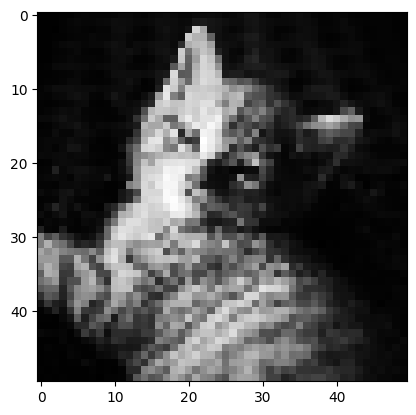

In [40]:
pick_in = open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features = []
labels = []

for feature ,label in data:
    features.append(feature)
    labels.append(label)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25)

#xtrain,xtest, ytrain, ytest =  train_test_split(features, labels, labels,test_size=0.25)

model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()


prediction=model.predict(xtest)
accuracy=model.score(xtest,ytest)

categories =['cats','dogs']

print('Accuracy:',accuracy)

print('Prediction is :   ', categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()                      




